In [74]:
import os
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.utils import shuffle
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Dropout
from keras.layers import BatchNormalization
from keras.layers.core import Flatten
from keras.layers.core import Dense
from tensorflow.keras.optimizers import RMSprop
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [2]:
TRAIN_DIR = './dataset/Training'
TEST_DIR = './dataset/Test'

In [3]:
#apple, banana, plum, pepper, cherry, grape, tomato, potato, pear, peach
fruits = ["Apple", "Banana", "Plum", "Pepper", "Cherry", "Grape", "Tomato", "Potato", "Pear", "Peach"]
def load_data(data_dir):
    data = []
    labels = []
    for sub_dir in os.listdir(data_dir):
        for f in fruits:
            if sub_dir.split(" ")[0] == f:
                img_dir = os.path.join(data_dir, sub_dir)
                for img in os.listdir(img_dir):
                    img_path = os.path.join(img_dir,img)
                    data.append(img_to_array(load_img(img_path, target_size = (32, 32), color_mode = "rgb")))
                    labels.append(f)
    return np.array(data), np.array(labels)

In [4]:
X_train, y_train = load_data(TRAIN_DIR)
X_test, y_test = load_data(TEST_DIR)

In [5]:
labelencoder = LabelEncoder()
y_train_encoded = labelencoder.fit_transform(y_train)
y_test_encoded = labelencoder.fit_transform(y_test)
y_train_encoded

array([0, 0, 0, ..., 9, 9, 9])

In [6]:
X_train.shape, y_train.shape

((32607, 32, 32, 3), (32607,))

In [7]:
X_test.shape, y_test.shape

((10906, 32, 32, 3), (10906,))

In [8]:
#Data Normalization
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [9]:
y_train_encoded = to_categorical(y_train_encoded,10)
y_test_encoded = to_categorical(y_test_encoded,10)
y_train_encoded.shape

(32607, 10)

In [100]:
y_train_encoded[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [10]:
#Shuffle the training data
X_train, y_train = shuffle(X_train, y_train)

In [11]:
# plotting images in the form of a 1 row x 5 cols grid.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

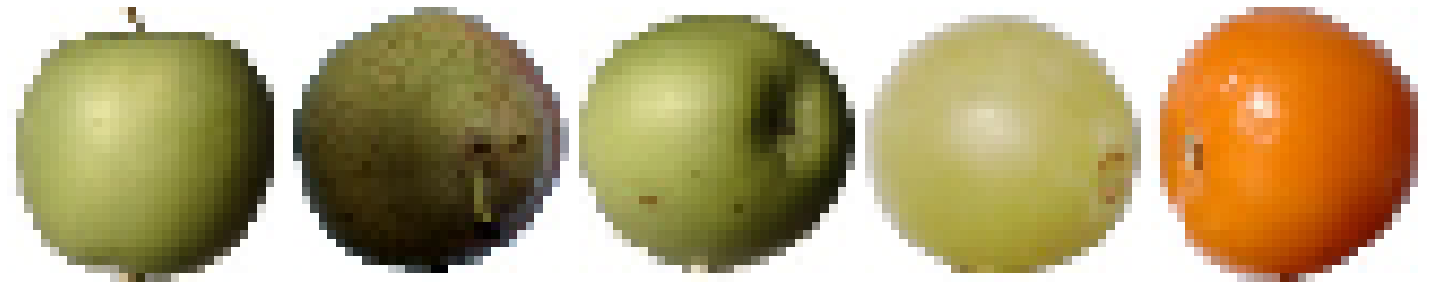

In [12]:
plotImages(X_train[:5])

## LeNet-5

In [61]:
#Set Epochs and batch size value
EPOCHS = 10
BATCH_SIZE = 32

In [14]:
lenet_model = Sequential()
lenet_model.add(Conv2D(32, (3, 3), activation = "tanh", strides=(1, 1), input_shape = (32, 32, 3), padding = "same"))
lenet_model.add(MaxPooling2D(2, 2))
lenet_model.add(Conv2D(32, (3, 3), strides=(1, 1),  activation = "tanh", padding = 'valid'))
lenet_model.add(MaxPooling2D(2, 2))
lenet_model.add(Conv2D(64, (3, 3), strides=(1, 1),  activation = "tanh", padding = 'valid'))
lenet_model.add(MaxPooling2D(2, 2))
lenet_model.add(Flatten())
lenet_model.add(Dense(512, activation = "tanh"))
lenet_model.add(Dense(10, activation = "softmax"))

'''
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=input_shape, padding="same"),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    tf.keras.layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation = 'tanh'),
    tf.keras.layers.Dense(84, activation = 'tanh'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])
'''


'\nmodel = tf.keras.Sequential([\n    tf.keras.layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation=\'tanh\', input_shape=input_shape, padding="same"),\n    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding=\'valid\'),\n    tf.keras.layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation=\'tanh\', padding=\'valid\'),\n    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding=\'valid\'),\n    tf.keras.layers.Flatten(),\n    tf.keras.layers.Dense(120, activation = \'tanh\'),\n    tf.keras.layers.Dense(84, activation = \'tanh\'),\n    tf.keras.layers.Dense(10, activation = \'softmax\')\n])\n'

In [15]:
lenet_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 64)          18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)              

In [16]:
lenet_model.compile(loss = "categorical_crossentropy", optimizer = Adam(learning_rate = 0.001), metrics = ["acc"])
lenet_result = lenet_model.fit(X_train, y_train_encoded, epochs = EPOCHS, batch_size = 32,
                               validation_split = 0.2)

Train on 26085 samples, validate on 6522 samples
Epoch 1/20
26085/26085 [==============================] - 38s 1ms/step - loss: 2.0184 - acc: 0.2388 - val_loss: 7.1755 - val_acc: 0.0000e+00
Epoch 2/20
26085/26085 [==============================] - 37s 1ms/step - loss: 2.0056 - acc: 0.2451 - val_loss: 7.1826 - val_acc: 0.0000e+00
Epoch 3/20
26085/26085 [==============================] - 34s 1ms/step - loss: 2.0024 - acc: 0.2453 - val_loss: 7.4822 - val_acc: 0.0000e+00
Epoch 4/20
26085/26085 [==============================] - 33s 1ms/step - loss: 1.9986 - acc: 0.2458 - val_loss: 8.2556 - val_acc: 0.0000e+00
Epoch 5/20
26085/26085 [==============================] - 39s 2ms/step - loss: 1.9918 - acc: 0.2475 - val_loss: 8.8744 - val_acc: 0.0000e+00
Epoch 6/20
26085/26085 [==============================] - 34s 1ms/step - loss: 1.9836 - acc: 0.2529 - val_loss: 9.0014 - val_acc: 0.0000e+00
Epoch 7/20
26085/26085 [==============================] - 38s 1ms/step - loss: 1.9704 - acc: 0.2559 - val

In [17]:
lenet_result

In [18]:
y_pred_lenet = lenet_model.predict(X_test)

In [19]:
def zero_one(y_pred, y_true):
    y_hat = []
    y_t = []
    for i in range(len(y_pred)):
        y_hat.append(np.argmax(y_pred[i]))
        y_t.append(np.argmax(y_true[i]))

    loss = []
    for i in range(len(y_pred)):
        if(y_hat[i] == y_t[i]):
            loss.append(0)
        else:
            loss.append(1)

    return np.mean(loss)

In [20]:
zero_one(y_pred, y_test_encoded)

0.8850174216027874

In [21]:
y_pred.shape

(10906, 10)

In [22]:
y_test_encoded.shape

(10906, 10)

## AlexNet

In [75]:
tf.keras.backend.clear_session()
alex_model = Sequential()

alex_model.add(Conv2D(16, 5, activation = "relu", strides = 1, input_shape = (32, 32, 3)))
#alex_model.add(BatchNormalization(axis = 3))
alex_model.add(MaxPooling2D(2, strides = 2))

alex_model.add(Conv2D(32, 5, activation = "relu", padding = 'same' , name = 'conv1'))
#alex_model.add(BatchNormalization(axis = 3 ,name='bn1'))
alex_model.add(MaxPooling2D(2, strides = 2, name = 'max1'))

alex_model.add(Conv2D(64, 5, activation = "relu" , padding = 'same' , name='conv2'))
#alex_model.add(BatchNormalization(axis = 3, name = 'bn2'))

alex_model.add(Conv2D(128, 5, activation = "relu", padding = 'same' , name='conv3'))
#alex_model.add(BatchNormalization(axis = 3, name = 'bn3'))

alex_model.add(Conv2D(512, 5, activation = "relu", padding = 'same' , name='conv4'))
#alex_model.add(BatchNormalization(axis = 3, name = 'bn4'))

alex_model.add(MaxPooling2D(3, strides = 2, name = 'max2'))
alex_model.add(Flatten())

alex_model.add(Dense(512, activation = 'relu', name = "fc0"))
alex_model.add(Dropout(0.5))
alex_model.add(Dense(512, activation = 'relu', name = 'fc1'))
alex_model.add(Dropout(0.5))
alex_model.add(Dense(10, activation='softmax', name = 'fc2'))

In [76]:
alex_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        1216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 14, 14, 32)        12832     
_________________________________________________________________
max1 (MaxPooling2D)          (None, 7, 7, 32)          0         
_________________________________________________________________
conv2 (Conv2D)               (None, 7, 7, 64)          51264     
_________________________________________________________________
conv3 (Conv2D)               (None, 7, 7, 128)         204928    
_________________________________________________________________
conv4 (Conv2D)               (None, 7, 7, 512)        

In [77]:
alex_model.compile(loss = "categorical_crossentropy", optimizer = Adam(learning_rate = 0.001), metrics = ["acc"])

In [78]:
alex_result = alex_model.fit(X_train, y_train_encoded, epochs = EPOCHS, batch_size = 32,
                               validation_split = 0.2)

Train on 26085 samples, validate on 6522 samples
Epoch 1/10
26085/26085 [==============================] - 214s 8ms/step - loss: 2.0211 - acc: 0.2404 - val_loss: 6.3921 - val_acc: 0.0000e+00
Epoch 2/10
26085/26085 [==============================] - 214s 8ms/step - loss: 2.0108 - acc: 0.2435 - val_loss: 6.8069 - val_acc: 0.0000e+00
Epoch 3/10
26085/26085 [==============================] - 212s 8ms/step - loss: 2.0079 - acc: 0.2453 - val_loss: 6.8299 - val_acc: 0.0000e+00
Epoch 4/10
26085/26085 [==============================] - 213s 8ms/step - loss: 2.0077 - acc: 0.2452 - val_loss: 7.4228 - val_acc: 0.0000e+00
Epoch 5/10
26085/26085 [==============================] - 219s 8ms/step - loss: 2.0065 - acc: 0.2451 - val_loss: 7.7905 - val_acc: 0.0000e+00
Epoch 6/10
26085/26085 [==============================] - 216s 8ms/step - loss: 2.0058 - acc: 0.2454 - val_loss: 8.5481 - val_acc: 0.0000e+00
Epoch 7/10
26085/26085 [==============================] - 211s 8ms/step - loss: 2.0057 - acc: 0.245

In [79]:
y_pred = alex_model.predict(X_test)

In [80]:
zero_one(y_pred, y_test_encoded)

0.8043278929029892

In [81]:
y_pred.shape

(10906, 10)

In [82]:
np.round(np.mean(alex_result.history['acc']), decimals = 4)

0.2447

In [83]:
np.round(np.mean(alex_result.history['loss']), decimals = 4)

2.0081

## VGGNet 16

In [101]:
vgg16_model = Sequential()
vgg16_model.add(Conv2D(input_shape=(32,32,3), filters=64,kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

vgg16_model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

vgg16_model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

vgg16_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

vgg16_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

vgg16_model.add(Flatten())
vgg16_model.add(Dense(units=4096, activation="relu"))
vgg16_model.add(Dense(units=4096, activation="relu"))
vgg16_model.add(Dense(units=10, activation="softmax")) 
##units are 1 because we are using binary activation

In [102]:
vgg16_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 8, 8, 256)        

In [103]:
vgg16_model.compile(optimizer = "adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [104]:
vgg16_result = vgg16_model.fit(X_train, y_train_encoded, epochs = EPOCHS, batch_size = 32,
                               validation_split = 0.2)

Train on 26085 samples, validate on 6522 samples
Epoch 1/10
  480/26085 [..............................] - ETA: 22:15 - loss: 14.4126 - accuracy: 0.2083

KeyboardInterrupt: 

In [96]:
y_pred = alex_model.predict(X_test)

In [97]:
zero_one(y_pred, y_test_encoded)

0.8043278929029892

In [98]:
np.round(np.mean(alex_result.history['acc']), decimals = 4)

0.2447

In [99]:
np.round(np.mean(alex_result.history['loss']), decimals = 4)

2.0081